In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [3]:
sales_train = pd.read_csv('../data/raw/sales_train_validation.csv')
print(f"Sales data shape: {sales_train.shape}")

calendar = pd.read_csv('../data/raw/calendar.csv')
print(f"Calendar shape: {calendar.shape}")

prices = pd.read_csv('../data/raw/sell_prices.csv')
print(f"Prices shape: {prices.shape}")

print("\n✅ Data loaded successfully!")


Sales data shape: (30490, 1919)
Calendar shape: (1969, 14)
Prices shape: (6841121, 4)

✅ Data loaded successfully!


In [4]:

# First few rows
print("\n📊 First 5 rows:")
print(sales_train.head())

# Column info
print("\n📊 Metadata columns:")
metadata_cols = ['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id']
print(sales_train[metadata_cols].head(10))

# Check hierarchy
print("\n📊 Hierarchy structure:")
print(f"Total products: {len(sales_train)}")
print(f"Unique items: {sales_train['item_id'].nunique()}")
print(f"Unique departments: {sales_train['dept_id'].nunique()}")
print(f"Unique categories: {sales_train['cat_id'].nunique()}")
print(f"Unique stores: {sales_train['store_id'].nunique()}")
print(f"Unique states: {sales_train['state_id'].nunique()}")

print("\n📊 Categories breakdown:")
print(sales_train.groupby('cat_id')['item_id'].nunique())

print("\n📊 States breakdown:")
print(sales_train.groupby('state_id')['store_id'].nunique())


📊 First 5 rows:
                              id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_validation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_validation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_validation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_005_CA_1_validation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   

  state_id  d_1  d_2  d_3  d_4  ...  d_1904  d_1905  d_1906  d_1907  d_1908  \
0       CA    0    0    0    0  ...       1       3       0       1       1   
1       CA    0    0    0    0  ...       0       0       0       0       0   
2       CA    0    0    0    0  ...       2       1       2       1       1   
3       CA    0    0    0    0  ...       1       0       5       4       1   
4       CA    0    0    0    0  ...       2       1       1       0       1   

   d_1909  d_1910  d_1911  

In [5]:
# Cell 4: Examine Calendar Data
print("="*60)
print("CALENDAR DATA")
print("="*60)

print(calendar.head(10))
print("\n📊 Date range:")
print(f"Start: {calendar['date'].min()}")
print(f"End: {calendar['date'].max()}")
print(f"Total days: {len(calendar)}")

print("\n📊 Events:")
print(calendar['event_name_1'].value_counts().head(10))

print("\n📊 SNAP days (food stamps):")
print(calendar[['snap_CA', 'snap_TX', 'snap_WI']].sum())

CALENDAR DATA
         date  wm_yr_wk    weekday  wday  month  year     d event_name_1  \
0  2011-01-29     11101   Saturday     1      1  2011   d_1          NaN   
1  2011-01-30     11101     Sunday     2      1  2011   d_2          NaN   
2  2011-01-31     11101     Monday     3      1  2011   d_3          NaN   
3  2011-02-01     11101    Tuesday     4      2  2011   d_4          NaN   
4  2011-02-02     11101  Wednesday     5      2  2011   d_5          NaN   
5  2011-02-03     11101   Thursday     6      2  2011   d_6          NaN   
6  2011-02-04     11101     Friday     7      2  2011   d_7          NaN   
7  2011-02-05     11102   Saturday     1      2  2011   d_8          NaN   
8  2011-02-06     11102     Sunday     2      2  2011   d_9    SuperBowl   
9  2011-02-07     11102     Monday     3      2  2011  d_10          NaN   

  event_type_1 event_name_2 event_type_2  snap_CA  snap_TX  snap_WI  
0          NaN          NaN          NaN        0        0        0  
1        

In [6]:
# Cell 5: Examine Price Data
print("="*60)
print("PRICE DATA")
print("="*60)

print(prices.head(10))
print(f"\nPrice statistics:")
print(prices['sell_price'].describe())

print("\n📊 Price changes over time:")
# Sample one product
sample_item = prices[prices['item_id'] == 'FOODS_1_001'].copy()
sample_item = sample_item.sort_values('wm_yr_wk')
print(sample_item.head(10))

PRICE DATA
  store_id        item_id  wm_yr_wk  sell_price
0     CA_1  HOBBIES_1_001     11325        9.58
1     CA_1  HOBBIES_1_001     11326        9.58
2     CA_1  HOBBIES_1_001     11327        8.26
3     CA_1  HOBBIES_1_001     11328        8.26
4     CA_1  HOBBIES_1_001     11329        8.26
5     CA_1  HOBBIES_1_001     11330        8.26
6     CA_1  HOBBIES_1_001     11331        8.26
7     CA_1  HOBBIES_1_001     11332        8.26
8     CA_1  HOBBIES_1_001     11333        8.26
9     CA_1  HOBBIES_1_001     11334        8.26

Price statistics:
count    6.841121e+06
mean     4.410952e+00
std      3.408814e+00
min      1.000000e-02
25%      2.180000e+00
50%      3.470000e+00
75%      5.840000e+00
max      1.073200e+02
Name: sell_price, dtype: float64

📊 Price changes over time:
        store_id      item_id  wm_yr_wk  sell_price
368746      CA_1  FOODS_1_001     11101         2.0
6512555     WI_3  FOODS_1_001     11101         2.0
1700446     CA_3  FOODS_1_001     11101         2

In [7]:
# Cell 6: Transform Sales Data to Long Format
print("="*60)
print("TRANSFORMING TO LONG FORMAT")
print("="*60)

# This is KEY - convert from wide to long format
# Select one store-item for testing first
test_series = sales_train[sales_train['id'] == 'FOODS_1_001_CA_1_validation'].copy()

# Get sales columns
sales_cols = [col for col in test_series.columns if col.startswith('d_')]
print(f"Sales columns: {len(sales_cols)} days")

# Melt to long format
test_long = test_series.melt(
    id_vars=['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'],
    value_vars=sales_cols,
    var_name='d',
    value_name='sales'
)

print(f"\nLong format shape: {test_long.shape}")
print(test_long.head())

# Merge with calendar to get actual dates
test_long = test_long.merge(calendar[['d', 'date']], on='d', how='left')
test_long['date'] = pd.to_datetime(test_long['date'])

print("\n✅ With dates:")
print(test_long.head())

TRANSFORMING TO LONG FORMAT
Sales columns: 1913 days

Long format shape: (1913, 8)
                            id      item_id  dept_id cat_id store_id state_id  \
0  FOODS_1_001_CA_1_validation  FOODS_1_001  FOODS_1  FOODS     CA_1       CA   
1  FOODS_1_001_CA_1_validation  FOODS_1_001  FOODS_1  FOODS     CA_1       CA   
2  FOODS_1_001_CA_1_validation  FOODS_1_001  FOODS_1  FOODS     CA_1       CA   
3  FOODS_1_001_CA_1_validation  FOODS_1_001  FOODS_1  FOODS     CA_1       CA   
4  FOODS_1_001_CA_1_validation  FOODS_1_001  FOODS_1  FOODS     CA_1       CA   

     d  sales  
0  d_1      3  
1  d_2      0  
2  d_3      0  
3  d_4      1  
4  d_5      4  

✅ With dates:
                            id      item_id  dept_id cat_id store_id state_id  \
0  FOODS_1_001_CA_1_validation  FOODS_1_001  FOODS_1  FOODS     CA_1       CA   
1  FOODS_1_001_CA_1_validation  FOODS_1_001  FOODS_1  FOODS     CA_1       CA   
2  FOODS_1_001_CA_1_validation  FOODS_1_001  FOODS_1  FOODS     CA_1       C

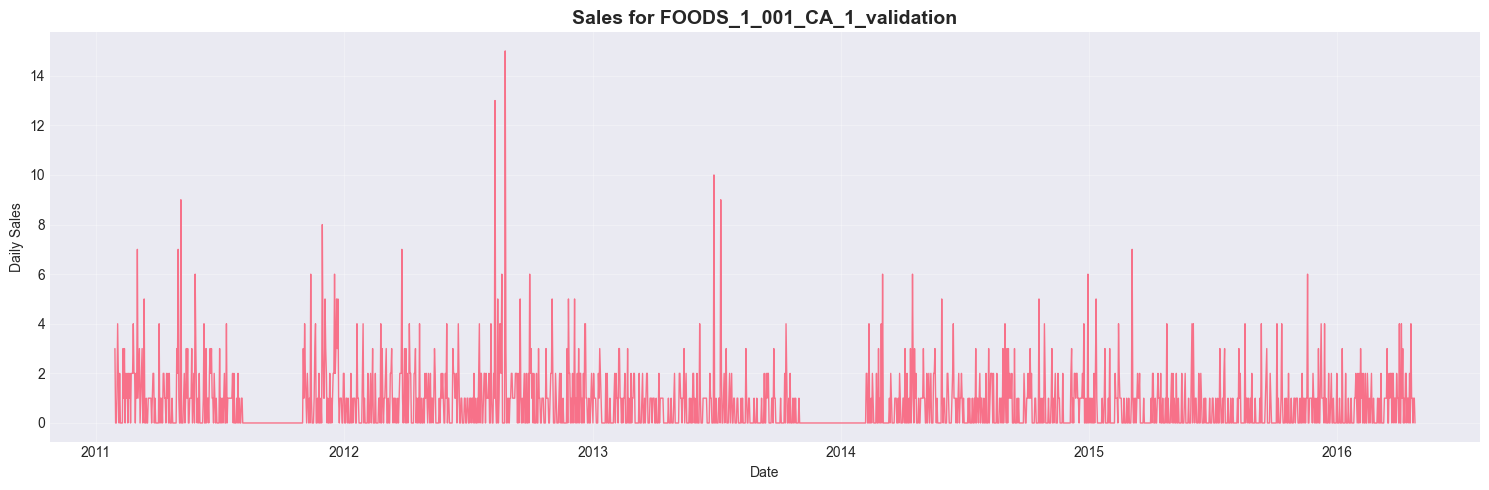


📊 Sales statistics:
count    1913.000000
mean        0.785677
std         1.258055
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        15.000000
Name: sales, dtype: float64

Zero sales days: 1078 (56.4%)


In [9]:
# Cell 7: Visualize Sample Time Series

# Plot the test series
plt.figure(figsize=(15, 5))
plt.plot(test_long['date'], test_long['sales'], linewidth=1)
plt.title(f"Sales for {test_series['id'].values[0]}", fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Daily Sales')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n📊 Sales statistics:")
print(test_long['sales'].describe())
print(f"\nZero sales days: {(test_long['sales'] == 0).sum()} ({(test_long['sales'] == 0).mean()*100:.1f}%)")

COMPARING DIFFERENT PRODUCTS

FOODS_3_180_CA_1_validation:
  Mean sales: 0.18
  Std: 0.48
  CV: 2.70
  Zero%: 85.8%

HOUSEHOLD_2_383_CA_3_validation:
  Mean sales: 0.61
  Std: 1.01
  CV: 1.67
  Zero%: 62.3%

FOODS_3_409_CA_3_validation:
  Mean sales: 0.19
  Std: 0.62
  CV: 3.33
  Zero%: 88.4%

FOODS_1_097_CA_2_validation:
  Mean sales: 0.88
  Std: 1.54
  CV: 1.74
  Zero%: 62.7%

HOBBIES_1_272_TX_2_validation:
  Mean sales: 0.05
  Std: 0.23
  CV: 4.40
  Zero%: 95.0%


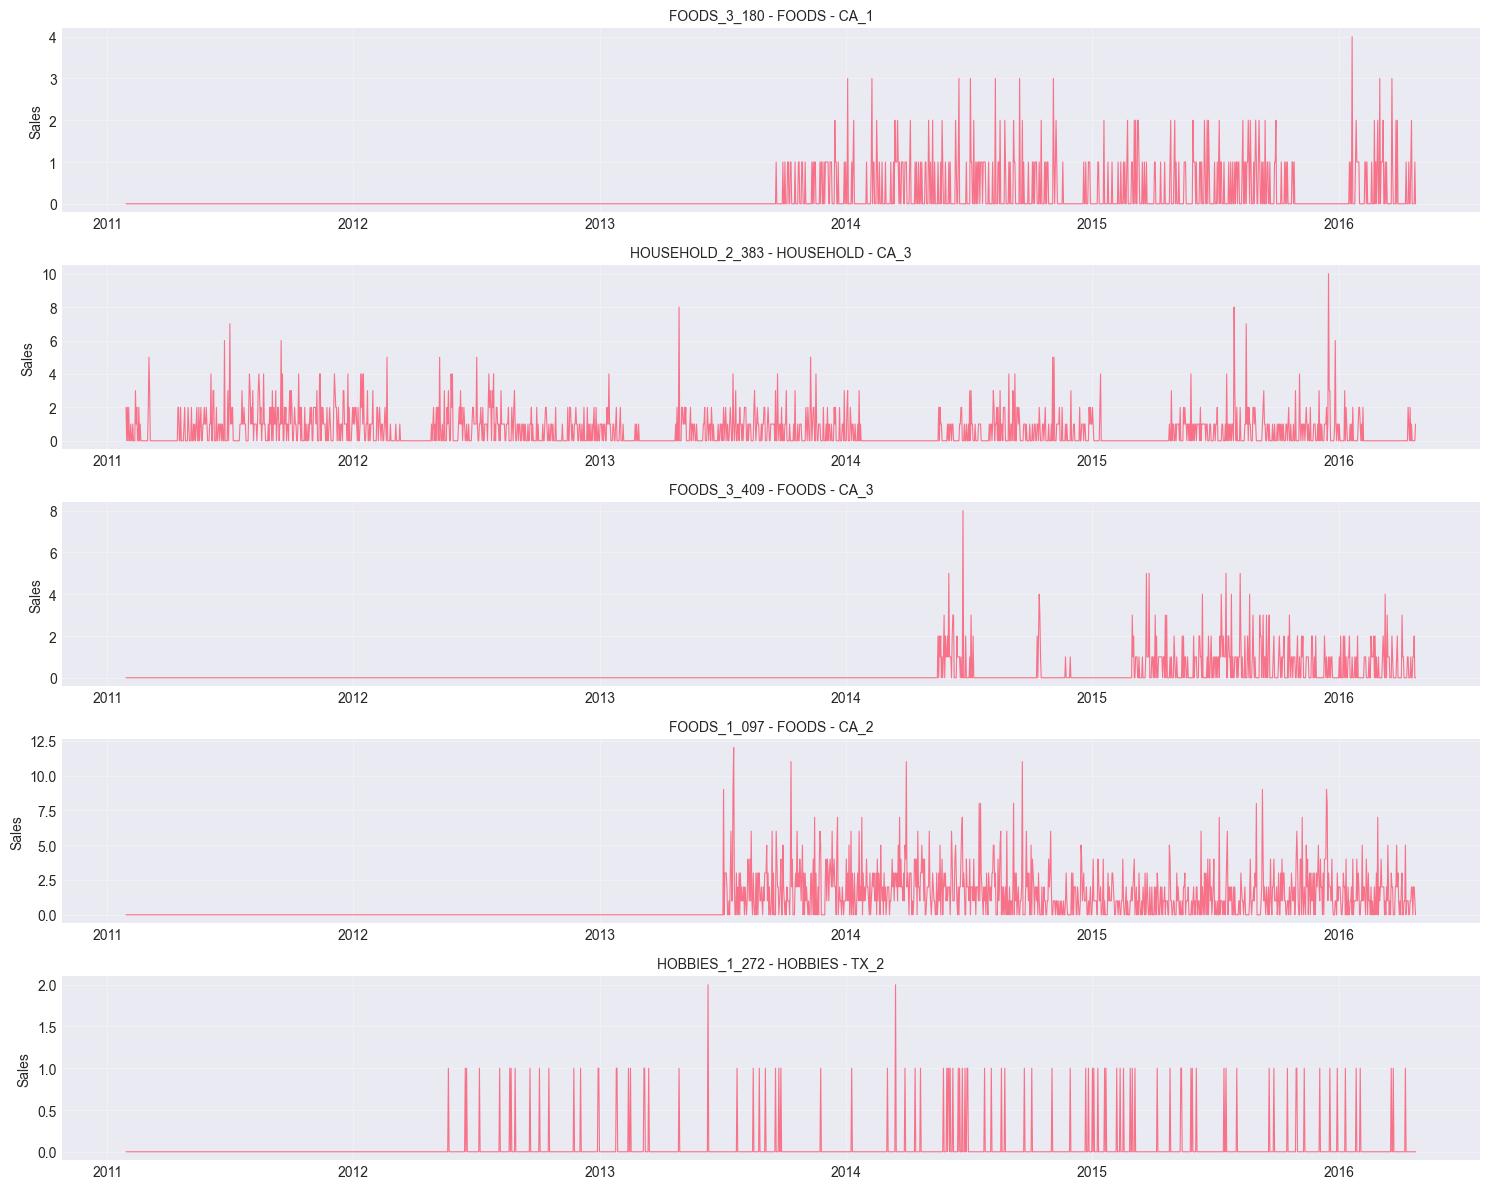

In [10]:
# Cell 8: Check Multiple Products
print("="*60)
print("COMPARING DIFFERENT PRODUCTS")
print("="*60)

# Sample 5 different products
sample_ids = sales_train['id'].sample(5, random_state=42).values

fig, axes = plt.subplots(5, 1, figsize=(15, 12))

for idx, product_id in enumerate(sample_ids):
    # Get this product's data
    product_data = sales_train[sales_train['id'] == product_id].copy()
    
    # Melt to long format
    product_long = product_data.melt(
        id_vars=['id', 'item_id', 'cat_id', 'store_id'],
        value_vars=sales_cols,
        var_name='d',
        value_name='sales'
    )
    
    # Merge with dates
    product_long = product_long.merge(calendar[['d', 'date']], on='d')
    product_long['date'] = pd.to_datetime(product_long['date'])
    
    # Plot
    axes[idx].plot(product_long['date'], product_long['sales'], linewidth=0.8)
    axes[idx].set_title(f"{product_data['item_id'].values[0]} - {product_data['cat_id'].values[0]} - {product_data['store_id'].values[0]}", 
                       fontsize=10)
    axes[idx].set_ylabel('Sales')
    axes[idx].grid(True, alpha=0.3)
    
    # Print stats
    print(f"\n{product_id}:")
    print(f"  Mean sales: {product_long['sales'].mean():.2f}")
    print(f"  Std: {product_long['sales'].std():.2f}")
    print(f"  CV: {product_long['sales'].std() / product_long['sales'].mean():.2f}")
    print(f"  Zero%: {(product_long['sales'] == 0).mean()*100:.1f}%")

plt.tight_layout()
plt.show()

SALES BY CATEGORY


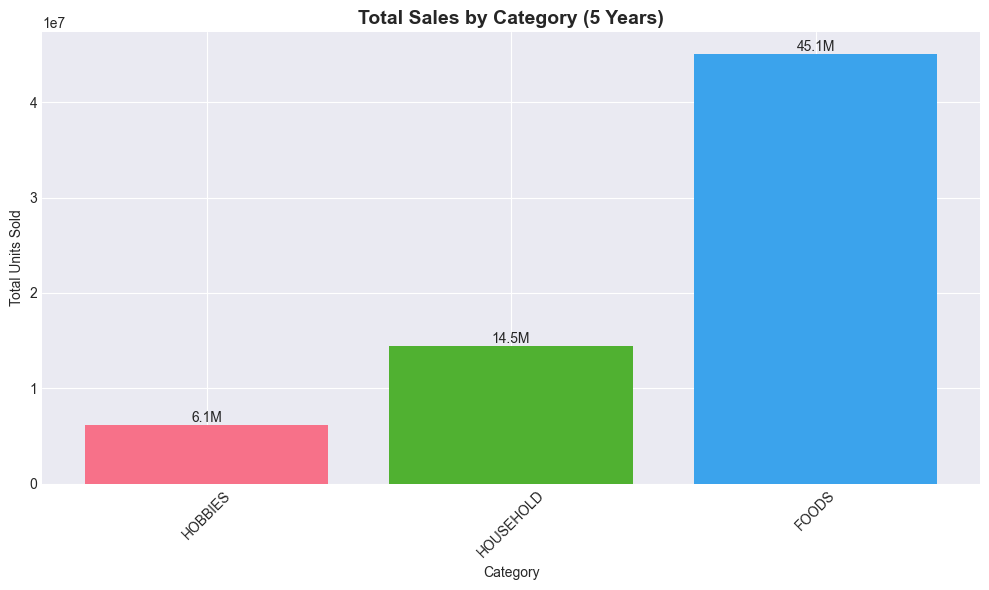


📊 Sales by category:
FOODS: 45,089,939 units
HOUSEHOLD: 14,480,670 units
HOBBIES: 6,124,800 units


In [11]:
# Cell 9: Analyze by Category
print("="*60)
print("SALES BY CATEGORY")
print("="*60)

# Calculate total sales per category
category_sales = {}

for cat in sales_train['cat_id'].unique():
    cat_data = sales_train[sales_train['cat_id'] == cat][sales_cols].sum(axis=0)
    category_sales[cat] = cat_data.sum()

# Plot
plt.figure(figsize=(10, 6))
cats = list(category_sales.keys())
values = list(category_sales.values())
plt.bar(cats, values, color=sns.color_palette("husl", len(cats)))
plt.title("Total Sales by Category (5 Years)", fontsize=14, fontweight='bold')
plt.xlabel("Category")
plt.ylabel("Total Units Sold")
plt.xticks(rotation=45)
for i, v in enumerate(values):
    plt.text(i, v, f'{v/1e6:.1f}M', ha='center', va='bottom')
plt.tight_layout()
plt.show()

print("\n📊 Sales by category:")
for cat, val in sorted(category_sales.items(), key=lambda x: x[1], reverse=True):
    print(f"{cat}: {val:,.0f} units")